In [32]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Input
from tensorflow.keras import Sequential
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

In [16]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print("\nFirst Review (as Integer):\n", x_train[0])
print("\nFirst Review label:", y_train[0])


First Review (as Integer):
 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

First Review label: 1


In [18]:
maxlen=200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [26]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim = 32))
model.add(GlobalAveragePooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [28]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6611 - loss: 0.5786 - val_accuracy: 0.8746 - val_loss: 0.3068
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9044 - loss: 0.2460 - val_accuracy: 0.8872 - val_loss: 0.2828
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9306 - loss: 0.1873 - val_accuracy: 0.8788 - val_loss: 0.3086
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9439 - loss: 0.1612 - val_accuracy: 0.8726 - val_loss: 0.3330
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9537 - loss: 0.1288 - val_accuracy: 0.8752 - val_loss: 0.3508
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9588 - loss: 0.1149 - val_accuracy: 0.8746 - val_loss: 0.3826
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9679 - loss: 0.0950 - val_accuracy: 0.8576 - val_loss: 0.4663
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9733 - loss: 0.0796 - val_accuracy: 0

In [40]:
y_pred = (model.predict(x_test)>0.5).astype("int32").flatten()

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


In [45]:
result = pd.DataFrame()
result['Actual'], result['predicted'] = y_test, y_pred
result.sample(5)

,Actual,predicted
11079,1,0
770,1,1
16768,0,0
22961,0,1
14735,0,0


In [46]:
acc = accuracy_score(y_test,y_pred)
print("\nTest Accuracy: ", acc)


Test Accuracy:  0.8484


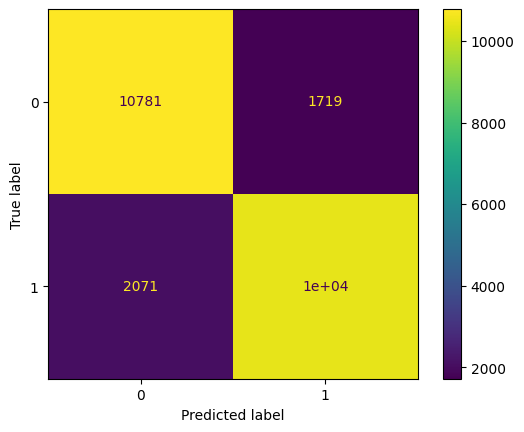

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     12500
           1       0.86      0.83      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

